# Tercera Lección 

#### _<font color=blue>  Objetivo de la lección: </font>_

<font color=blue>
 Aprender las diferentes fases del Aprendizaje de Datos (ML): Ingeniería de características y Modelado de Datos.
</font>

<h2 align="center">El flujo de trabajo en un proyecto de ciencia de datos </h2>

El conjunto de  lineamientos específicos ('ducto') en un proyecto de  ciencia de datos varía dependiendo de la naturaleza del mismo. Aquí se utiliza el ducto:

### Análisis exploratorio de los datos

### Ingeniería de Características

### Modelado de datos

 ***
 Especificamente en esta leccion se tratan los dos últimos puntos
 

_Ajuste un poco el estilo de este libro trabajo para tener graficas centradas_ 

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

## Análisis exploratorio de los datos
Los resultados de la lección pasada

### Características
Los nombres de las características del conjunto de datos

In [22]:

caracteristicas =  ['a:radio','b:textura','c:perimetro', \
             'd:area', 'e:suavidad','f:compactes', \
             'g:concavidad', 'h:puntos_concavos','i:simetria',\
             'j:dimension_fractal']

columnas = ['ID', 'Diagnostico'] + \
              list(map(lambda x: x[2:] + '_promedio', caracteristicas)) + \
              list(map(lambda x: x[2:] + '_error', caracteristicas)) +  \
              list(map(lambda x: x[2:] + '_peor', caracteristicas))      

####  Extracción 
Importe la librería **Pandas** para extraer el conjunto de datos 

In [23]:
import pandas as pd

data = pd.read_csv('../data/wisconsin.csv', names = columnas);
data = data.reset_index().drop(columns =['index'])
data = data.drop(columns='ID')

data['Benigno'] = (data['Diagnostico']=='B')*1
data['Maligno'] = 1 - data['Benigno']


La ingeniería de características es el proceso de utilizar el conocimiento de dominio de los datos para crear características que hacen que los algoritmos de aprendizaje automático funcionen. La ingeniería de características es fundamental para la aplicación del aprendizaje automático.

## Ingeniería de Características

 - Datos Categóricos
 - Divsion del conjunto de datos
 - Escalamiento de los atributos

### Ingeniería de Características

### Datos Categóricos

Los datos categóricos son variables que contienen valores de etiqueta en lugar de valores numéricos. El número de valores posibles a menudo se limita a un conjunto fijo.

Por ejemplo, los usuarios normalmente se describen por país, género, grupo de edad, etc.

De hecho ya se han  convertido los atributos del _Diagnóstico_ a valores numéricos:

In [24]:
data[['Maligno','Benigno']].sample(2)

,Maligno,Benigno
392,1,0
227,0,1


Las columnas _Maligno_ y _Benigno_ son redundates. El conocimiento de una, automaticamente nos define la otra. Elimine una:

In [25]:
data = data.drop(columns = 'Maligno')

En este punto la columna _Diagnostico_ tambien se vuelve redundante, por lo que también se elimina:

In [26]:
data = data.drop(columns = 'Diagnostico')


### División del conjunto de datos 

Los datos que utiliza, generalmente se dividen en datos de _entrenamiento_ y datos de _prueba_. 
El conjunto de entrenamiento contiene _un_ resultado conocido y 
el modelo aprende sobre estos datos para generalizarse a otros datos más adelante. 
Se cuenta con el conjunto de datos de prueba (o subconjunto) para probar la predicción del modelo 
en este subconjunto.
***

***
Primero, separe el conjunto total de diagnósticos (presentado por la letra _Y_) del resto de los atributos (representados por la letra _X_)
***

In [9]:
X = data.iloc[:, 0:29].values
Y = data.iloc[:, 30].values

Separe el conjunto de entrenamiento y el conjunto prueba usando la biblioteca **SciKit-Learn**. En especifico, use el método 'train_test_split':

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

El parametro _test_\__size_ que aparece en el método

_train_\__test_\__split()_

representa el porcentaje de los datos _(X,Y)_  que serán usados como datos de prueba. En este caso se ha usado el veinticinco porciento. El parámetro _random_\__state_ sirve para establecer la semilla del algoritmo aleatorio que selecciona los conjuntos de datos 
***

### Escalamiento de los atributos 

La mayoría de las veces, un conjunto de datos contendrá características altamente variables en su magnitudes, unidades y rango. Por ejemplo note la gran disparidad que existe entre las columnas 'dimension_fractal' y 'radio_promedio':

In [11]:
data[['area_promedio','dimension_fractal_promedio']].describe() 

,area_promedio,dimension_fractal_promedio
count,569.000000,569.000000
mean,654.889104,0.062798
std,351.914129,0.007060
min,143.500000,0.049960
25%,420.300000,0.057700
50%,551.100000,0.061540
75%,782.700000,0.066120
max,2501.000000,0.097440


 Asi como la cercania o lejania entre dos ciudades distintas se establece con la distancia que los separa, en estadística también se tiene el concepto de distancia entre los datos _medidos_ con los datos del _modelo teórico_. De hecho, la noción de distancia en estadística es la misma que la que hay para dos ciudades: la medida Euclideana.
 Con ella, se puede decir si nuestras predicciones del modelo están cerca o lejos de las predicciones de los datos medidos. Es un poco descabellado comparar distancias de ciudades con las distancias entre dos hormigas en un mismo hormiguero, pero los ejemplos del 'area_promedio' y 'dimension_fractal_promedio' arriba expuestos  están demostrando que se encuentra en esta situacion.
 ***

_<div style="text-align: center">  Es deseable llevar todas las características al mismo nivel de magnitudes (normalizar los datos). Esto se puede lograr mediante la escala. Esto significa transformar todos los datos a una misma  escala específica, 
como  de 0 a 100 o de  0 a 1.  </div>_
 ***

Para normalizar los datos, use el metodo _StandardScaler_ de la bilbioteca **sklearn**

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Modelado de datos

El modelado de datos en ingeniería de software representa el proceso de crear un modelo de datos para un sistema de información mediante la aplicación de las técnicas de Aprendizaje de Datos


En el área del aprendizaje de maquinas, las predicciones se diferencían  en dos tipos. Por un lado, las predicciones que toman valores en el  continúo (en la recta real), se les llama _Regresiones_. Por ejemplo, el tiempo que tarda un avion en cruzar el continente. Mientras que las predicciones que involucran solo un número finito de predicciones (discreto o categórico), se les conoce como _clasificaciones_. Por ejemplo un conjunto de tres colores, el día o la noche, etc.
***

En el caso aquí tratado se desea predicir si el cancer es maligno o benigno, entonces se usan _algoritmos de clasificación para el aprendizaje supervisado_ 
***
La palabra supervisado, aquí significa que se concce la etiqueta final que se desea predecir: _Benigno_ o _Maligno_. Las etiquetas _Benigno_  y _Maligno_  que se usan para entrenar a la maquina, no deben ser llamadas  _predicciones_ sino _datos de salida_: toda prediccion es un dato de salida pero no al reves.


### Clasificación in ML
EN SUMA:

En aprendizaje automático y estadística, la clasificación consiste identificar cuál de un conjunto de categorías (subpoblaciones) pertenece una nueva observación, sobre la base de un conjunto de entrenamiento de datos que contienen observaciones (o instancias) cuya categoría de miembro es conocida.

## Algoritmos de ML

Los siguientes nombres de algoritmos de clasificación en Aprendizaje Automático, son de los más populares en el mundo de la ciencia de datos:

1. Regresión Logística

2. Vecino Más Cercano

3. Soporte de Máquinas de Vectores

4. Kernel SVM

5. Naïve Bayes

6. Árbol de Decisión

7. Bosques al Azar


La biblioteca **sklearn** incluye todos estos métodos. Se importarán las correspondientes sub-librerias .

Se ejemplifica a detalle el análisis de los datos para el caso de  la  _regresión logística_. Despues se introducen los demás algoritmos.

### REGRESIÓN LOGÍSTICA.

En su forma más sencilla (la cual es la que necesitamos aqui), la regresión logística modela las variables de salida 'Benigno y 'Maligno', en este caso se habla de una _regresión logística binaria_


El resultado de un paciente no influyen en los demás, entonces las pruebas de los pacientes constituyen un
__Ensayo de Bernoulli:__
Ensayos repetidos independientes de un experimento con exactamente dos resultados posibles.


#### Regresión Logística vs Regresión Ordinaria
La regresión logística difiere de la regresión ordinaria en que la segunda regresa valores continuos. En la regresión logísitica, la simplicidad de la regresión lineal es usada, pero tiene que ser adicionada con  una forma de convertir una variable binaria en una continua que pueda tomar cualquier valor real (negativo o positivo). 

Para ello se definen  la _frontera de decisión_ (_boundary decision_). 

Esta predicción categórica se puede basar en las probabilidades calculadas de éxito, y las probabilidades pronosticadas por encima de un valor de corte elegido se traducen en una predicción de éxito.

### Funciones de Activación

Computacionalmente es mejor aproximar probabilidades de valores categóricos con funciones continuas conocidas como funciones de activación.

### Ejemplo
Las siguientes dos funciones, son funciones de activacion y se conocen como las funciones _sigmoid_ y _tanh_:

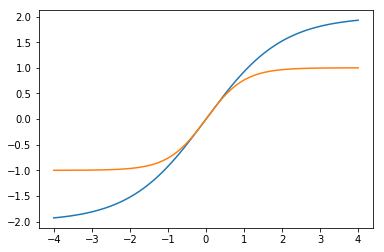

In [27]:

import numpy as np
from matplotlib import pyplot as plt

def sigmoid(x):  
    return  np.array([1 / (1 + np.exp(-y)) for y in x])

def tanh(x):
    return np.array([np.tanh(y) for y in x])

t = np.linspace(-4,4,400)

a = 4*sigmoid(t) - 2
b = 1*tanh(t) + 0

plt.plot(t,a,t,b)

plt.show()

A continuación cargamos el método de regresión logística de **skit-learn** que hará el _ajuste_:

In [14]:
#Usando el algoritmo de regresion logistica para entrenar el conjunto
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0,solver='liblinear')

#Una vez cargado el clasificador, hacemos el ajuste
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Teniendo el _clasificador_ entrenado, toca el turno de generar predicciones (_respuestas_) para el conjunto de prueba (_predictór_ ) X_test,


In [15]:
Y_pred = classifier.predict(X_test)

Para verificar la precisión de la predicción importe el método de confusión de matriz de métricas. La matríz de confusión es una forma de tabular el número de clasificaciones erróneas, es decir, el número de clases predichas (Y_pred) que terminaron en un contenedor de clasificación incorrecto basado en las clases verdaderas (Y_train).

### Matríz de Error o Matríz de Confusión 

En el análisis predictivo, una tabla de confusión (o matríz de confusión), es una tabla con dos filas y dos columnas que informa el número de _falsos positivos_, _falsos negativos_, _verdaderos positivos_ y _verdaderos negativos_.

Cada fila de la matríz representa las instancias en una clase predicha, mientras que cada columna representa las instancias en una clase real (o viceversa). En este caso, tenemos algo como:


| Prediccion/Real | Maligno | Benigno |
| --- | --- | --- |
| Maligno | $VP$ | $FP$|
| Benigno | $FN$ | $VN$ |

$VP$ = Número de  Verdadero Positivo

$FP$ = Número de Falso Positivo

$VN$ = Número de Verdadero Negativo

$FN$ = Número de Falso Negativo


**condición positiva (P):**
El número de casos positivos reales en los datos.

**condición negativa (N):**
El número de casos negativos reales en los datos.

Importe el método de métrica que contiene la matriz de confusión:

In [16]:
from sklearn import metrics
#La matriz de confusión
cm = metrics.confusion_matrix(Y_test, Y_pred)

print('Los', len(Y_test), 'casos probados', \
      'nos arrojan la siguiente matriz de confusión: \n', cm 
     )

Los 143 casos probados nos arrojan la siguiente matriz de confusión: 
 [[49  4]
 [ 4 86]]


### Exactitud 

Para el caso de errores categoricos (como en nuestro caso), esta simple clasificacion puede ser engañosa, por que las muestras pueden estar cargadas hacia un solo caso. Es recomendable apoyarnos en la _Exactitud Matematica_, la cual viene dada simplemente por la relacion:
***
$\textit{Exactitud} = \frac{\text{Número de Predicciones Verdaderas}}{\text{Número Total de Predicciones}}$


Para nuestro caso de predicciones categóricas binarias:


$\textit{Exactitud} = \frac{\text{VP+VN}}{\text{VP+VN+FP+FN}}$


***
El método _metrics.accuracy_\__score_ lo calcula por usted

In [17]:
metrics.accuracy_score(Y_test, Y_pred, normalize=True, sample_weight=None)

0.9440559440559441

Toca el turno de repetir el mismo ejercicio sobre las diferentes rutinas de Machine Learning que **sklearn** provee

In [18]:
clasificadores = {}

#Para el conjunto de entrenamiento usamos:

#Usando el Algoritmo de Regresion Logistica 
from sklearn.linear_model import LogisticRegression
clasificadores['Regresion Logistica'] = LogisticRegression(random_state = 0, solver='liblinear')
clasificadores['Regresion Logistica'].fit(X_train, Y_train)

#Usando el Algoritmo de K Vecinos Próximos 
from sklearn.neighbors import KNeighborsClassifier
clasificadores['K Vecinos Próximos'] = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clasificadores['K Vecinos Próximos'].fit(X_train, Y_train)


In [ ]:
#Usando el Algoritmo de Máquinas de Soporte Vectorial 
from sklearn.svm import SVC
clasificadores['Máquinas de Soporte Vectorial'] = SVC(kernel = 'linear', random_state = 0)
clasificadores['Máquinas de Soporte Vectorial'].fit(X_train, Y_train)

#Usando el Algoritmo de Núcleo SVM 
from sklearn.svm import SVC
clasificadores['Núcleo SVM '] = SVC(kernel = 'rbf', random_state = 0)
clasificadores['Núcleo SVM '].fit(X_train, Y_train)

#Usando el Algoritmo Bayessiano Ingenuo
from sklearn.naive_bayes import GaussianNB
clasificadores['Bayes Ingenuo'] = GaussianNB()
clasificadores['Bayes Ingenuo'].fit(X_train, Y_train)

#Usando el Arbol de Decisión 
from sklearn.tree import DecisionTreeClassifier
clasificadores['Arbol de Decisión'] = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clasificadores['Arbol de Decisión'].fit(X_train, Y_train)

#Usando el Bosque Aleatorio 
from sklearn.ensemble import RandomForestClassifier
clasificadores['Bosque Aleatorio'] = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clasificadores['Bosque Aleatorio'].fit(X_train, Y_train);

In [19]:
exactitudes = {}
for clasificador in clasificadores:
    
    Y_pred = clasificadores[clasificador].predict(X_test) 
    
    exactitudes[clasificador] = metrics.accuracy_score(Y_test, Y_pred, normalize=True, sample_weight=None)

In [20]:
for clasificador in exactitudes:
    print('El clasificador', clasificador, 'es exacto hasta un',  '%.2f' % (100*exactitudes[clasificador]),'%')

El clasificador Regresion Logistica es exacto hasta un 94.41 %
El clasificador K Vecinos Próximos es exacto hasta un 95.80 %
El clasificador Máquinas de Soporte Vectorial es exacto hasta un 96.50 %
El clasificador Núcleo SVM  es exacto hasta un 96.50 %
El clasificador Bayes Ingenuo es exacto hasta un 92.31 %
El clasificador Arbol de Decisión es exacto hasta un 95.10 %
El clasificador Bosque Aleatorio es exacto hasta un 95.80 %


## Conclusiones 

Se ha completado el ducto de ciencia de datos para el caso del conjunto de datos del cancer de mama de Wisconsin